In [ ]:
!python --version

Python 3.7.3


In [ ]:
!pip install geopandas
!pip install geopy

     |████████████████████████████████| 931kB 3.0MB/s eta 0:00:01
     |████████████████████████████████| 1.8MB 7.3MB/s eta 0:00:01
     |████████████████████████████████| 10.4MB 5.4MB/s eta 0:00:01
     |████████████████████████████████| 14.7MB 4.0MB/s eta 0:00:01
     |████████████████████████████████| 92kB 6.4MB/s  eta 0:00:01
You should consider upgrading via the 'pip install --upgrade pip' command.
     |████████████████████████████████| 112kB 3.5MB/s eta 0:00:01
You should consider upgrading via the 'pip install --upgrade pip' command.


In [ ]:
import sklearn

# Common imports
import numpy as np
import os
import geopandas
import geopy

# Setting random seed
np.random.seed(42)

# setting up matplot
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Saving the actual figures
PROJECT_ROOT_DIR = "."

In [ ]:
import tarfile
from six.moves import urllib

DOWNLOAD_URL = 'https://query.data.world/s/ldg6mnpuzhacnymhqhmd6sf7f2sa35'
DATA_PATH = os.path.join('datasets', 'cancer')

def fetch_data(data_url=DOWNLOAD_URL, data_path=DATA_PATH):
  if not os.path.isdir(data_path):
    os.makedirs(data_path)

fetch_data()

In [ ]:
import pandas as pd

def load_data(data_path=DATA_PATH):
    csv_path = os.path.join(data_path, "cancer_reg.csv")
    return pd.read_csv(csv_path, encoding = "ISO-8859-1")

In [ ]:
cancer_data = load_data()
cancer_data.head(10)

,avgAnnCount,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,binnedInc,MedianAge,...,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate
0,1397.0,469,164.9,489.8,61898,260131,11.2,499.748204,"(61494.5, 125635]",39.3,...,NaN,41.6,32.9,14.0,81.780529,2.594728,4.821857,1.843479,52.856076,6.118831
1,173.0,70,161.3,411.6,48127,43269,18.6,23.111234,"(48021.6, 51046.4]",33.0,...,53.8,43.6,31.1,15.3,89.228509,0.969102,2.246233,3.741352,45.372500,4.333096
2,102.0,50,174.7,349.7,49348,21026,14.6,47.560164,"(48021.6, 51046.4]",45.0,...,43.5,34.9,42.1,21.1,90.922190,0.739673,0.465898,2.747358,54.444868,3.729488
3,427.0,202,194.8,430.4,44243,75882,17.1,342.637253,"(42724.4, 45201]",42.8,...,40.3,35.0,45.3,25.0,91.744686,0.782626,1.161359,1.362643,51.021514,4.603841
4,57.0,26,144.4,350.1,49955,10321,12.5,0.000000,"(48021.6, 51046.4]",48.3,...,43.9,35.1,44.0,22.7,94.104024,0.270192,0.665830,0.492135,54.027460,6.796657
5,428.0,152,176.0,505.4,52313,61023,15.6,180.259902,"(51046.4, 54545.6]",45.4,...,38.8,32.6,43.2,20.2,84.882631,1.653205,1.538057,3.314635,51.220360,4.964476
6,250.0,97,175.9,461.8,37782,41516,23.2,0.000000,"(37413.8, 40362.7]",42.6,...,35.0,28.3,46.4,28.7,75.106455,0.616955,0.866157,8.356721,51.013900,4.204317
7,146.0,71,183.6,404.0,40189,20848,17.8,0.000000,"(37413.8, 40362.7]",51.7,...,33.1,25.9,50.9,24.1,89.406636,0.305159,1.889077,2.286268,48.967033,5.889179
8,88.0,36,190.5,459.4,42579,13088,22.3,0.000000,"(40362.7, 42724.4]",49.3,...,37.8,29.9,48.1,26.6,91.787477,0.185071,0.208205,0.616903,53.446998,5.587583
9,4025.0,1380,177.8,510.9,60397,843954,13.1,427.748432,"(54545.6, 61494.5]",35.8,...,NaN,44.4,31.4,16.5,74.729668,6.710854,6.041472,2.699184,50.063573,5.533430


In [ ]:
len(cancer_data)

3047

In [ ]:
virginia_cancer_data = cancer_data[cancer_data['Geography'].str.contains(', Virginia')]
virginia_cancer_data_geo = cancer_data[cancer_data['Geography'].str.contains(', Virginia')]

In [ ]:
len(virginia_cancer_data)

125

In [ ]:
virginia_cancer_data2 = virginia_cancer_data.dropna(axis='columns')
len(virginia_cancer_data2)

125

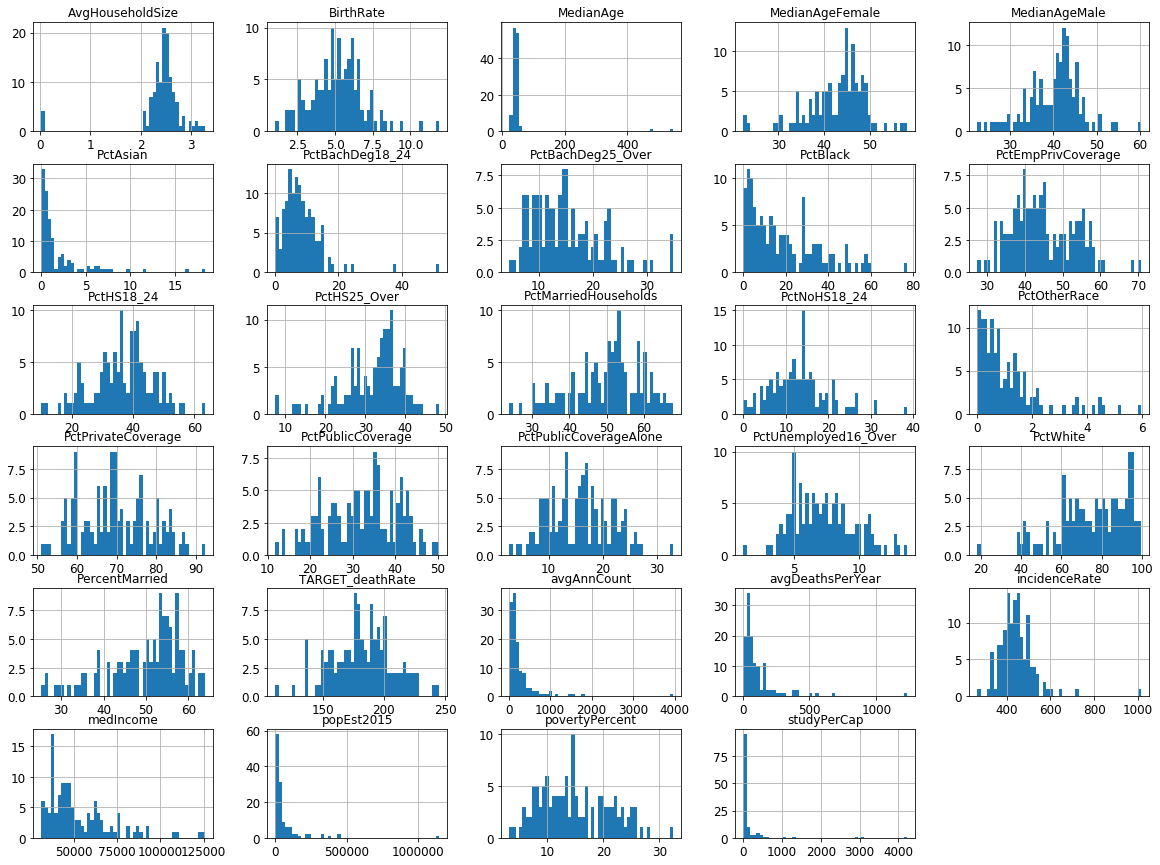

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
virginia_cancer_data2.hist(bins=50, figsize=(20,15))
# save_fig("attribute_histogram_plots")
plt.show()

In [ ]:
corr_matrix = virginia_cancer_data2.corr()
corr_matrix['TARGET_deathRate'].sort_values(ascending=False)

TARGET_deathRate          1.000000
PctPublicCoverageAlone    0.624620
PctUnemployed16_Over      0.615566
PctPublicCoverage         0.547804
povertyPercent            0.474889
PctHS25_Over              0.419704
PctBlack                  0.326371
PctHS18_24                0.246619
incidenceRate             0.218130
PctNoHS18_24              0.174462
MedianAgeFemale           0.074372
BirthRate                 0.073476
MedianAgeMale            -0.028653
studyPerCap              -0.073191
MedianAge                -0.076654
AvgHouseholdSize         -0.141497
PctWhite                 -0.212007
PctOtherRace             -0.217901
avgDeathsPerYear         -0.233816
avgAnnCount              -0.278072
popEst2015               -0.327533
PercentMarried           -0.328091
PctMarriedHouseholds     -0.369004
PctAsian                 -0.425574
PctBachDeg18_24          -0.430977
PctEmpPrivCoverage       -0.491960
medIncome                -0.557623
PctBachDeg25_Over        -0.575756
PctPrivateCoverage  

In [ ]:
corr = virginia_cancer_data2.corr()
corr.style.background_gradient(cmap='coolwarm')

,avgAnnCount,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,MedianAge,MedianAgeMale,MedianAgeFemale,AvgHouseholdSize,PercentMarried,PctNoHS18_24,PctHS18_24,PctBachDeg18_24,PctHS25_Over,PctBachDeg25_Over,PctUnemployed16_Over,PctPrivateCoverage,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate
avgAnnCount,1,0.989973,-0.278072,-0.0429128,0.424781,0.977892,-0.228918,-0.0345204,-0.0473241,-0.302158,-0.29114,0.185546,-0.00765677,-0.076562,-0.243377,0.299039,-0.469551,0.461523,-0.106899,0.263553,0.248694,-0.375701,-0.280669,-0.229199,0.0606595,0.657311,0.422039,0.0282101,0.0302044
avgDeathsPerYear,0.989973,1,-0.233816,-0.0797109,0.384331,0.957897,-0.203148,-0.0441585,-0.0420216,-0.312123,-0.290129,0.189635,-0.0225206,-0.0792813,-0.232342,0.274988,-0.457068,0.433044,-0.0708654,0.222339,0.20676,-0.341063,-0.237428,-0.237284,0.0778265,0.616964,0.406108,0.00120332,0.0445091
TARGET_deathRate,-0.278072,-0.233816,1,0.21813,-0.557623,-0.327533,0.474889,-0.073191,-0.0766537,-0.0286534,0.074372,-0.141497,-0.328091,0.174462,0.246619,-0.430977,0.419704,-0.575756,0.615566,-0.581693,-0.49196,0.547804,0.62462,-0.212007,0.326371,-0.425574,-0.217901,-0.369004,0.0734763
incidenceRate,-0.0429128,-0.0797109,0.21813,1,-0.0987431,-0.10045,0.172874,-0.0378496,-0.104068,-0.356198,-0.376791,-0.147515,-0.483875,-0.12572,-0.170856,-0.00216474,-0.119684,0.120913,0.137676,0.10401,0.073639,-0.127282,-0.0746096,-0.33301,0.324487,0.071861,-0.0306853,-0.373389,-0.204275
medIncome,0.424781,0.384331,-0.557623,-0.0987431,1,0.494349,-0.806088,-0.0971704,-0.0211543,-0.138001,-0.209594,0.352187,0.422537,-0.0830637,-0.191848,0.587246,-0.626713,0.791051,-0.512201,0.80655,0.781234,-0.804504,-0.808102,0.0207637,-0.215835,0.636219,0.524129,0.514227,-0.0490581
popEst2015,0.977892,0.957897,-0.327533,-0.10045,0.494349,1,-0.254943,-0.0212204,-0.0554189,-0.310372,-0.31307,0.210301,0.0193337,-0.0678772,-0.262253,0.342622,-0.502573,0.50076,-0.145907,0.294519,0.297898,-0.425899,-0.323651,-0.209561,0.0186242,0.733049,0.489862,0.0666871,0.0515378
povertyPercent,-0.228918,-0.203148,0.474889,0.172874,-0.806088,-0.254943,1,0.0461505,-0.0772504,-0.22923,-0.14658,-0.371707,-0.71442,0.0382818,-0.172653,-0.303371,0.254252,-0.501404,0.574227,-0.717427,-0.612457,0.599412,0.726211,-0.241117,0.344149,-0.262354,-0.250933,-0.700291,-0.0823121
studyPerCap,-0.0345204,-0.0441585,-0.073191,-0.0378496,-0.0971704,-0.0212204,0.0461505,1,-0.0404309,0.00759194,-0.0758377,-0.0337317,-0.0404563,-0.0771883,0.0642548,-0.0465224,0.0170637,0.00688512,-0.0340955,-0.0753559,-0.0270189,0.0728753,0.0955879,0.123086,-0.145135,0.0712779,0.00374305,-0.142997,0.00847572
MedianAge,-0.0473241,-0.0420216,-0.0766537,-0.104068,-0.0211543,-0.0554189,-0.0772504,-0.0404309,1,0.137876,0.127164,0.00918472,0.157582,-0.00946935,0.179904,-0.100062,0.109562,-0.0987037,0.000562439,-0.0505658,-0.0190923,0.0440222,0.035103,0.0707575,-0.0472135,-0.102294,-0.0237002,0.107648,-0.0808918
MedianAgeMale,-0.302158,-0.312123,-0.0286534,-0.356198,-0.138001,-0.310372,-0.22923,0.00759194,0.137876,1,0.942255,-0.120802,0.626438,0.251221,0.515887,-0.206908,0.473765,-0.384109,-0.184126,-0.177876,-0.347558,0.502024,0.176184,0.325544,-0.187434,-0.478732,-0.415654,0.4032,0.12798


In [ ]:
def correlation(dataset, threshold):
    col_corr = set() # Set of all the names of deleted columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i, j] >= threshold) and (corr_matrix.columns[j] not in col_corr):
                colname = corr_matrix.columns[i] # getting the name of column
                col_corr.add(colname)
                if colname in dataset.columns:
                    del dataset[colname] # deleting the column from the dataset

    return dataset

testing = correlation(virginia_cancer_data2, .5)
virginia_cancer_data = pd.DataFrame(testing)

In [ ]:
virginia_cancer_data

,avgAnnCount,TARGET_deathRate,incidenceRate,medIncome,povertyPercent,studyPerCap,binnedInc,MedianAge,MedianAgeMale,Geography,AvgHouseholdSize,PctNoHS18_24,PctHS25_Over,PctWhite,PctBlack,BirthRate
200,335.0,194.2,437.1,34842,20.5,19.274879,"(34218.1, 37413.8]",46.0,43.6,"Henry County, Virginia",2.3200,12.8,34.1,73.335869,22.280335,6.007453
201,12.0,111.3,327.0,38636,14.6,0.000000,"(37413.8, 40362.7]",59.0,60.2,"Highland County, Virginia",2.1000,16.1,38.6,99.509804,0.000000,10.791367
202,205.0,200.6,460.2,64350,10.2,0.000000,"(61494.5, 125635]",44.5,43.4,"Isle of Wight County, Virginia",2.5700,14.1,27.7,71.821489,22.775602,3.667228
203,410.0,149.0,423.0,75926,7.9,27.342201,"(61494.5, 125635]",45.4,43.4,"James City County, Virginia",2.4900,13.5,21.1,80.285257,13.542654,4.819607
204,38.0,180.3,383.4,46331,14.8,0.000000,"(45201, 48021.6]",45.9,42.8,"King and Queen County, Virginia",2.4600,20.9,41.1,68.815086,26.540951,9.290030
205,108.0,195.7,491.5,76206,7.5,0.000000,"(61494.5, 125635]",36.6,36.3,"King George County, Virginia",2.9600,11.3,30.3,76.637388,17.952112,6.194545
206,90.0,187.4,514.8,64305,8.8,0.000000,"(61494.5, 125635]",40.7,40.0,"King William County, Virginia",2.6600,5.7,39.4,76.523576,19.544014,6.631717
207,101.0,190.6,446.8,45827,13.7,0.000000,"(45201, 48021.6]",55.6,53.4,"Lancaster County, Virginia",2.1300,10.2,32.8,69.772666,28.016893,4.297329
208,107.0,224.2,330.5,31429,26.6,0.000000,"[22640, 34218.1]",42.8,40.3,"Lee County, Virginia",2.5200,21.4,33.6,93.933984,3.824486,6.208251
209,862.0,136.5,364.9,122641,3.9,449.912014,"(61494.5, 125635]",35.3,34.9,"Loudoun County, Virginia",3.0800,16.6,13.8,67.770250,7.432026,6.198748


In [ ]:
import time
from geopy.geocoders import Nominatim

locator = Nominatim(user_agent='myGeocoder')
location = locator.geocode('Highland County, Virginia')
print('Latitude = {}, Longitude = {}'.format(location.latitude, location.longitude))

#hhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhh
y_pred = []
latitude = [] 
longitude = []

count = 0
for row in virginia_cancer_data['Geography'].T:
    time.sleep(.1)
    cry = str(row)
    location = locator.geocode(cry)
    latitude.append(location.latitude)
    longitude.append(location.longitude)

Latitude = 38.386039499999995, Longitude = -79.51798530574015


In [ ]:
latitude2 = pd.DataFrame(latitude)
#print(latitude2.head)
longitude2 = pd.DataFrame(longitude)
#print(longitude2.head)

combined = pd.concat([longitude2, latitude2], axis = 1)
# combined = pd.concat([latitude2, longitude2], names=['Latitude', 'Longitude'])
# print(combined.head)

combined = pd.DataFrame(combined.set_axis(['Longitude', "Latitude"], axis=1, inplace=False ))
print(combined[Longitude].head)

<bound method NDFrame.head of      Longitude   Latitude
0   -79.924292  36.672581
1   -79.517985  38.386039
2   -76.724814  36.895368
3   -76.797252  37.321148
4   -76.879416  37.719675
..         ...        ...
120 -78.470482  38.295450
121 -77.576830  36.640571
122 -78.942563  36.747244
123 -77.446416  37.744783
124 -77.423412  37.545519

[125 rows x 2 columns]>

In [ ]:
virginia_cancer_data = virginia_cancer_data.drop('Geography', axis=1)
virginia_cancer_data = virginia_cancer_data.drop('binnedInc', axis=1)

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
pipeline = Pipeline([
        ('std_scaler', StandardScaler()),
    ])

virginia_cancer_data = pd.DataFrame(pipeline.fit_transform(virginia_cancer_data), columns=virginia_cancer_data.columns)

In [0]:
virginia_cancer_data

In [0]:
y = virginia_cancer_data[1]
X = virginia_cancer_data.drop(1, axis=1)

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=42)

In [0]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score

import numpy as np

types = ['linear', 'poly', 'rbf']
bestTypes = []
bestParams = []
for i in types:
  parameters = {'C':[1,3, 6,8, 10], "gamma": [.001, .01, .15], "degree": [.8, 1.1, 1.5]}
  svr = SVR(kernel=i)
  clf = GridSearchCV(svr, parameters)
  clf.fit(X_train, y_train)
  y_predict = clf.predict(X_test)
  
  bestTypes.append(clf.best_estimator_)
  bestParams.append(clf.best_params_)

  print('------------'+i+'------------')
  print("Root mean squared error: "+str(np.sqrt(mean_squared_error(y_predict,y_test))))
  print("Best parameters set found on development set:\n"+str(clf.best_params_))
  print()

In [ ]:
# Function: K Means
# -------------
# K-Means is an algorithm that takes in a dataset and a constant
# k and returns k centroids (which define clusters of data in the
# dataset which are similar to one another).
from matplotlib import pyplot as plt

class K_Means:
    def __init__(self, k =3, max_iterations = 500):
      self.k = k
      self.max_iterations = max_iterations
      self.p=1
      self.assigned = []
      self.index = 0
      self.originalPoints = []
      self.v = []
    
    def initialize_centroids(self, points, k):
      centroids = points.copy()
      np.random.shuffle(centroids)
      t = centroids[:k]
      return t

    def find_closest_centroid(self, points, centroids):
      #rootPow = 1.0/(self.p*1.0)
      distances = np.power((np.abs(np.power(points - centroids[:, np.newaxis],self.p))).sum(axis=2), 1/(self.p*1.0))
      #distances = np.power(points - centroids[:, np.newaxis],self.p.sum(axis=2)
      return np.argmin(distances, axis=0)

    def assign_centroids(self, points, centroids):
      return np.array([points[self.index==k].mean(axis=0) for k in range(centroids.shape[0])])

    def step(self, points, centroids):
      self.index = self.find_closest_centroid(points, centroids)
      self.centroids = self.assign_centroids(points, centroids)
      #print(self.centroids)

    def determineChanged(self, previousCentroids):
      return not np.array_equal(previousCentroids, self.centroids)

    def fit(self, points, p, k, v, showData=True):
      self.v = v
      self.p = p
      self.originalPoints = points.to_numpy()
      points = points[v].to_numpy()
      
      changed = True #change in between iterations
      
      self.centroids = self.initialize_centroids(points, k)
      #print(str(self.centroids))

      previousCentroids = self.centroids.copy()
      count = 0
      while(changed and count<1000):
        self.step(points, self.centroids)
        changed = self.determineChanged(previousCentroids)
        count+=1
        previousCentroids = self.centroids.copy()
      
      if showData:
        self.plot(points)
      else:
        return self.getSse(points)

    def plot(self, points):
      plt.title("Location Based Clustering Visualization")
      plt.scatter(self.originalPoints[:, 0], self.originalPoints[:,1], c=self.index, s=2)
      #plt.scatter(centroids[:,0], centroids[:,1], c='g')
      self.getData(points)

    def plotElbow(self, points, p, v):
      self.p = p
      plt.title("Elbow Plot")
      plt.xlabel = "k"
      plt.ylabel ="Sum Squared Error"
      plt
      tuples = []
      iters = [2,3,4,5,6,7,8,9,10, 12,18]
      for i in iters:
        tuples.append(self.fit(points, p, i, v, showData=False))
      plt.plot(iters, tuples)
    
    def getData(self, points):
      print("Categories:\n"+str(self.v))
      print("Cluster means:\n" + str(self.centroids))
      std = np.array([points[self.index==k].std(axis=0) for k in range(self.centroids.shape[0])])
      print("Standard Deviations:\n"+str(std))

      sse = self.getSse(points)
      print("Sum Squared Error:\n"+str(sse))
    
    def getSse(self, points):
      sse = 0
      sse = np.sum(np.sum(np.power(points[self.index==k]-self.centroids[k],2)) for k in range(self.centroids.shape[0]))
      return sse



In [ ]:
kmeans = K_Means()
kmeans.fit(combined.to_numpy(), 2, 2, ['longitude', 'latitude'])

KeyError: "None of [Index(['longitude', 'latitude'], dtype='object')] are in the [columns]"